In [1]:
# This block imports several packages that are necessary for the model building 
# and simply loads the data from sklearn dataset library.
from __future__ import division, print_function, unicode_literals

In [2]:
# This used a command from the package matplotlib inline to specify that all the graphs should be plotted inline.
%matplotlib inline

In [3]:
# Import other packages that will be required to do Knn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [4]:
# Also, import urlopen package to read files directly from the websites
from urllib.request import urlopen

link = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
f = urlopen(link)
data = f.read()
print(data)
print(type(data))

b'842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\n84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758\n84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173\n84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885

In [5]:
feature_name = ["ID number", "Diagnosis", "radius (mean)", "texture (mean)", "perimeter (mean)", "area (mean)", "smoothness (mean)", "compactness (mean)", "concavity (mean)", "concave points (mean)", "symmetry (mean)", "fractal dimension (mean)", "radius (std)", "texture (std)", "perimeter (std)", "area (std)", "smoothness (std)", "compactness (std)", "concavity (std)", "concave points (std)", "symmetry (std)", "fractal dimension (std)", "radius (largest)", "texture (largest)", "perimeter (largest)", "area (largest)", "smoothness (largest)", "compactness (largest)", "concavity (largest)", "concave points (largest)", "symmetry (largest)", "fractal dimension (largest)"]
feature_name

['ID number',
 'Diagnosis',
 'radius (mean)',
 'texture (mean)',
 'perimeter (mean)',
 'area (mean)',
 'smoothness (mean)',
 'compactness (mean)',
 'concavity (mean)',
 'concave points (mean)',
 'symmetry (mean)',
 'fractal dimension (mean)',
 'radius (std)',
 'texture (std)',
 'perimeter (std)',
 'area (std)',
 'smoothness (std)',
 'compactness (std)',
 'concavity (std)',
 'concave points (std)',
 'symmetry (std)',
 'fractal dimension (std)',
 'radius (largest)',
 'texture (largest)',
 'perimeter (largest)',
 'area (largest)',
 'smoothness (largest)',
 'compactness (largest)',
 'concavity (largest)',
 'concave points (largest)',
 'symmetry (largest)',
 'fractal dimension (largest)']

In [6]:
# Converting bytes to Pandas dataframe
# Code adpated from: https://stackoverflow.com/questions/47379476/how-to-convert-bytes-data-into-a-python-pandas-dataframe
from io import StringIO
s=str(data,'utf-8')
data = StringIO(s) 
df=pd.read_csv(data, header=None)
df.columns = feature_name
df.head()

,ID number,Diagnosis,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (largest),texture (largest),perimeter (largest),area (largest),smoothness (largest),compactness (largest),concavity (largest),concave points (largest),symmetry (largest),fractal dimension (largest)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Change the column types
df[["radius (mean)", "texture (mean)", "perimeter (mean)", "area (mean)", "smoothness (mean)", "compactness (mean)", "concavity (mean)", "concave points (mean)", "symmetry (mean)", "fractal dimension (mean)", "radius (std)", "texture (std)", "perimeter (std)", "area (std)", "smoothness (std)", "compactness (std)", "concavity (std)", "concave points (std)", "symmetry (std)", "fractal dimension (std)", "radius (largest)", "texture (largest)", "perimeter (largest)", "area (largest)", "smoothness (largest)", "compactness (largest)", "concavity (largest)", "concave points (largest)", "symmetry (largest)", "fractal dimension (largest)"]] = df[["radius (mean)", "texture (mean)", "perimeter (mean)", "area (mean)", "smoothness (mean)", "compactness (mean)", "concavity (mean)", "concave points (mean)", "symmetry (mean)", "fractal dimension (mean)", "radius (std)", "texture (std)", "perimeter (std)", "area (std)", "smoothness (std)", "compactness (std)", "concavity (std)", "concave points (std)", "symmetry (std)", "fractal dimension (std)", "radius (largest)", "texture (largest)", "perimeter (largest)", "area (largest)", "smoothness (largest)", "compactness (largest)", "concavity (largest)", "concave points (largest)", "symmetry (largest)", "fractal dimension (largest)"]].apply(pd.to_numeric)
df['Diagnosis'] = pd.Categorical(df.Diagnosis)

In [8]:
# Calculate summary statistics
df.describe()

,ID number,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),...,radius (largest),texture (largest),perimeter (largest),area (largest),smoothness (largest),compactness (largest),concavity (largest),concave points (largest),symmetry (largest),fractal dimension (largest)
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Group by Average
df.groupby("Diagnosis")["radius (mean)", "texture (mean)", "perimeter (mean)", "area (mean)", "smoothness (mean)", "compactness (mean)", "concavity (mean)", "concave points (mean)", "symmetry (mean)", "fractal dimension (mean)"].mean()

C:\Users\seanj\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean)
Diagnosis,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


In [10]:
# Group by Standard Deviation
df.groupby("Diagnosis")["radius (std)", "texture (std)", "perimeter (std)", "area (std)", "smoothness (std)", "compactness (std)", "concavity (std)", "concave points (std)", "symmetry (std)", "fractal dimension (std)"].mean()

C:\Users\seanj\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,radius (std),texture (std),perimeter (std),area (std),smoothness (std),compactness (std),concavity (std),concave points (std),symmetry (std),fractal dimension (std)
Diagnosis,,,,,,,,,,
B,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636
M,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062


In [11]:
# Group By the Average of Three Largest Sample  
df.groupby("Diagnosis")["radius (largest)", "texture (largest)", "perimeter (largest)", "area (largest)", "smoothness (largest)", "compactness (largest)", "concavity (largest)", "concave points (largest)", "symmetry (largest)", "fractal dimension (largest)"].mean()

C:\Users\seanj\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,radius (largest),texture (largest),perimeter (largest),area (largest),smoothness (largest),compactness (largest),concavity (largest),concave points (largest),symmetry (largest),fractal dimension (largest)
Diagnosis,,,,,,,,,,
B,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [12]:
# Correlation Matrix
cor = df.corr()

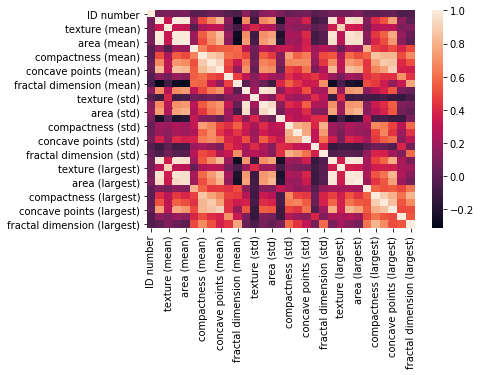

In [13]:
# Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib
# Hitmap
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cor, annot=False)
plt.show()

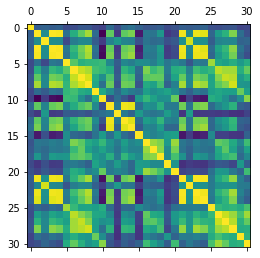

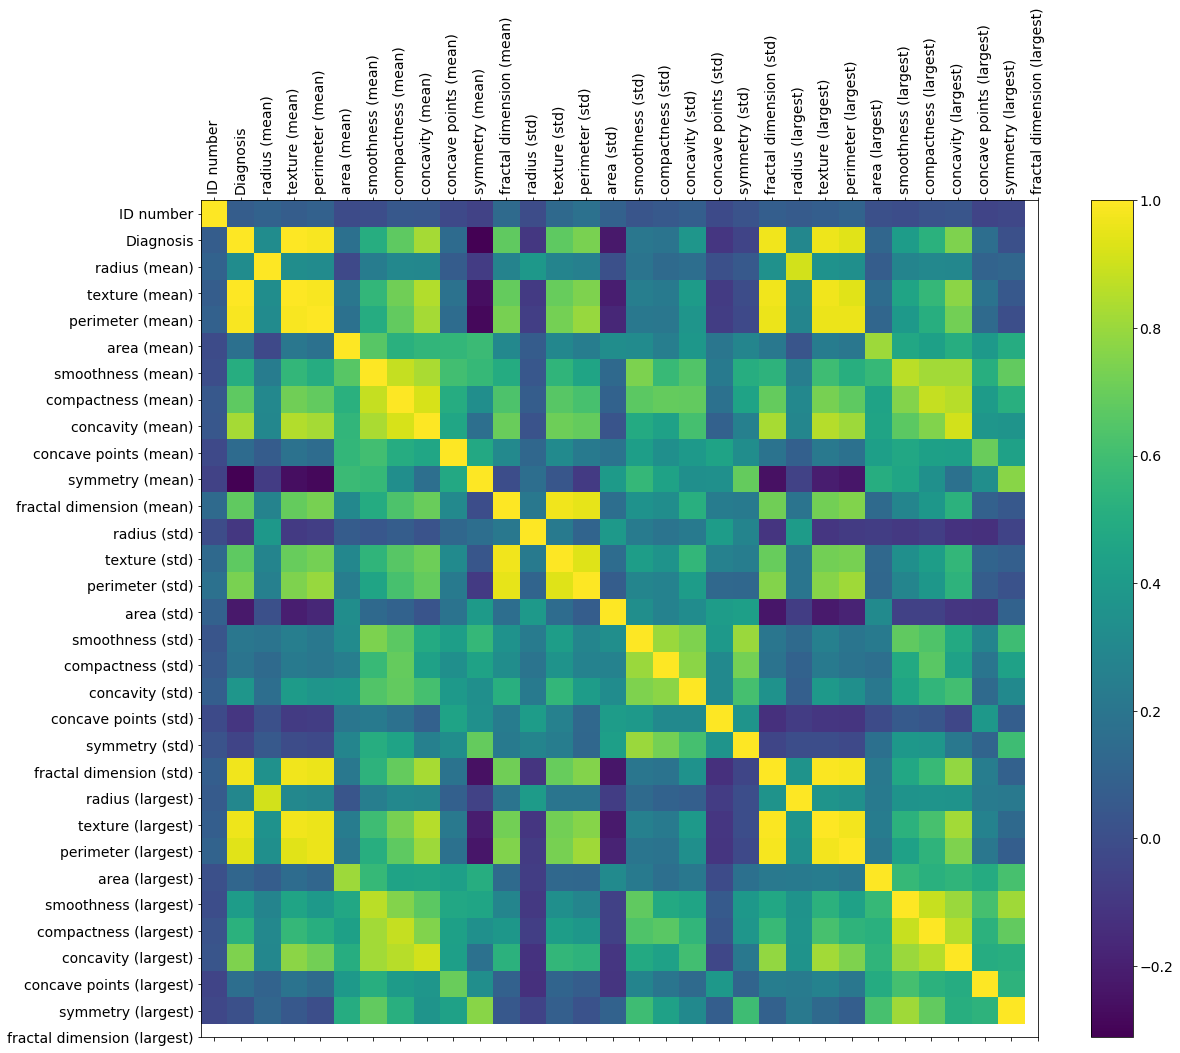

In [14]:
# Correlation matrix
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
plt.matshow(df.corr())

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.show()

In [15]:
# Retrieve features/attributes of dataset
X = df.iloc[:,2:31]
X

,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean),...,fractal dimension (std),radius (largest),texture (largest),perimeter (largest),area (largest),smoothness (largest),compactness (largest),concavity (largest),concave points (largest),symmetry (largest)
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [16]:
y = df.iloc[:,1]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: category
Categories (2, object): [B, M]

In [17]:
################################# Function to Visualize Decision Regions of kNN #################################
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# This function visualizes the "decision surfaces" of the kNN algorithm
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [18]:
############################################## Split the Data ##############################################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [19]:
########################################## Distribution Target Variable ##########################################
print('Labels counts in y:', pd.value_counts(y))
print('Labels counts in y_train:', pd.value_counts(y_train))
print('Labels counts in y_test:', pd.value_counts(y_test))

Labels counts in y: B    357
M    212
Name: Diagnosis, dtype: int64
Labels counts in y_train: B    250
M    148
Name: Diagnosis, dtype: int64
Labels counts in y_test: B    107
M     64
Name: Diagnosis, dtype: int64


## Standardizing the features:

In [20]:
############################################# Normalization #############################################
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set X by centering and scaling

In [21]:
############################################# Train the Model #############################################
from sklearn import neighbors, datasets

# KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=3, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
knn = knn.fit(X_train_std, y_train)  

In [22]:
X_train_std.shape

(398, 29)

In [23]:
y_train.shape

(398,)

In [ ]:
####################################### Visualize decision regions #######################################
# Stacks needed for visualization of decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
# Visualization of decision regions
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(398, 569))

# Set parameters for visualization
plt.xlabel('Attibutes [standardized]')
plt.ylabel('Target [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ValueError: query data dimension must match training data dimension

In [40]:
############################################# Evaluate the Model #############################################
################################################### KNN ######################################################

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.metrics import confusion_matrix

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

[[106   1]
 [  6  58]]
Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 0.98
F1 score (out-of-sample):  0.9555629802873371
F1 score (in-sample)    :  0.9837263186588523
Kappa score (out-of-sample):  0.9112083673318003
Kappa score (in-sample)    :  0.9674606202648934
              precision    recall  f1-score   support

           B       0.95      0.99      0.97       107
           M       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [25]:
############################################# Find Nearest Neighbors #############################################

# Finds the K-neighbors of a point. 
# print('The k nearest neighbors (and the corresponding distances) to user [1, 1] are:', knn.kneighbors([[1., 1.]]))


# ValueError: query data dimension must match training data dimension

ValueError: query data dimension must match training data dimension

In [26]:
# Finds the K-neighbors of all points in the training set.
print('The k nearest neighbors to each user are:', knn.kneighbors(X, return_distance=False)) 

The k nearest neighbors to each user are: [[ 25 306 327]
 [ 25 306 327]
 [ 25 306 327]
 ...
 [ 25 306 327]
 [ 25 306 327]
 [ 25 306 327]]


In [27]:
# Computes the (weighted) graph of k-Neighbors for points in X (complete training set)
A = knn.kneighbors_graph(X) # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html
A.toarray()

# Result looks odd

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
########################### Visualize decision regions for different k of kNN ###########################

# from sklearn import neighbors, datasets
# Visualization of the decision boundaries


# from sklearn import neighbors, datasets


# for n_neighbors in [1,5,20,50,100]: # Different k values
    #knn = neighbors.KNeighborsClassifier(n_neighbors, p=2, metric='minkowski') 
    #The default metric is minkowski, which is a generalization of the Euclidean distance
    # with p=2 is equivalent to the standard Euclidean distance.
    #knn = knn.fit(X_train_std, y_train)            # with p=1 is equivalent to the Mahattan distance.

    #X_combined_std = np.vstack((X_train_std, X_test_std))
    #y_combined = np.hstack((y_train, y_test))

    #plot_decision_regions(X_combined_std, y_combined, 
                          classifier=knn, test_idx=range(105, 150))

    #plt.xlabel('petal length [standardized]')
    #plt.ylabel('petal width [standardized]')
    #plt.legend(loc='upper left')
    #plt.tight_layout()
    #plt.title("3-Class classification (k = %i, weights = '%s')"
              #% (n_neighbors, 'distance'))
    #plt.show()
    
# ValueError: query data dimension must match training data dimension
